In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns  ## This will be for the prettier confusion matrix vis
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
# Read in data
census = pd.read_csv("ACS_Full_Features.csv")
census.head()

,NAME,Median Age by Sex,Total Population,White,Black/African American,American Indian/Alaskan,Asian,Hawaiian/Pacific Islander,Some Other Race,Two or More Races,...,Black/African American Population (%),Asian Population (%),Hawaiian/Pacific Islander Population (%),American Indian/Alaskan Population (%),Some Other Race Population (%),Two or More Races Population (%),Disabled Population (%),Disabled Population Category,state,county
0,"Autauga County, Alabama",39.0,58761,43747,11496,59,658,0,321,2480,...,19.563997,1.119790,0.000000,0.100407,0.546281,4.220486,16.039550,Medium,1,1
1,"Baldwin County, Alabama",43.7,233420,195998,19445,848,2046,31,4414,10638,...,8.330477,0.876532,0.013281,0.363294,1.891012,4.557450,13.656927,Low,1,3
2,"Barbour County, Alabama",40.6,24877,11309,11668,74,126,3,1088,609,...,46.902762,0.506492,0.012059,0.297464,4.373518,2.448044,15.958516,Medium,1,5
3,"Bibb County, Alabama",40.3,22251,16872,4603,21,69,0,108,578,...,20.686711,0.310098,0.000000,0.094378,0.485371,2.597636,18.412656,Medium,1,7
4,"Blount County, Alabama",40.8,59077,53941,729,227,100,117,1859,2104,...,1.233983,0.169271,0.198047,0.384244,3.146741,3.561454,16.839041,Medium,1,9


In [ ]:
# Need to drop columns that aren't necessary (redundant data) and the name, state, and county columns, since they aren't needed either
census.columns

Index(['NAME', 'Median Age by Sex', 'Total Population', 'White',
       'Black/African American', 'American Indian/Alaskan', 'Asian',
       'Hawaiian/Pacific Islander', 'Some Other Race', 'Two or More Races',
       'Male', 'Female', 'Never Married', 'Now Married', 'Widowed', 'Divorced',
       '12th Grade, No Diploma', 'High School Diploma', 'GED',
       'Some College <1 Year', 'Some College >1 Year', 'Associate's Degree',
       'Bachelor's Degree', 'Master's Degree', 'Professional School Degree',
       'Doctorate', 'Median Income', 'Population Below Poverty Line',
       'Disabled Population', 'Total Income 10k(%)', 'Total Income 10k-15k(%)',
       'Total Income 15k-25k(%)', 'Total Income 25k-35k(%)',
       'Total Income 35k-50(%)', 'Total Income 50k-75k(%)',
       'Total Income 75k-100k(%)', 'Total Income 100k-150k(%)',
       'Total Income 150k-200k(%)', 'Total Income >200k(%)', 'Income Category',
       'Poverty Rate (%)', 'Poverty Rate Classification', 'Total Degrees',
   

In [ ]:
# I'll drop the numerical race columns (percent is better), along with the categorical versions of Total Degreees, POC population, disabled Population, etc.
# Degree categories are being dropped in favor of 'degree percentage', and 'population below poverty line' is dropped because the binary category 'Poverty Rate Classification'
# is serving as the label

# Wound up dropping indiviudal race percentages other than white to make two race categories (otherwise it wouldn't run the model) along with total income categories

census_log = census.drop(columns = ['NAME', 'White', 'Black/African American', 'American Indian/Alaskan', 'Asian',
                                    'Hawaiian/Pacific Islander', 'Some Other Race', 'Two or More Races', '12th Grade, No Diploma', 'High School Diploma', 'GED',
       'Some College <1 Year', 'Some College >1 Year',
                                    "Associate's Degree", "Bachelor's Degree", "Master's Degree", 'Professional School Degree',
                                    'Doctorate', 'Population Below Poverty Line', 'Total Income 10k(%)', 'Total Income 10k-15k(%)',
       'Total Income 15k-25k(%)', 'Total Income 25k-35k(%)',
       'Total Income 35k-50(%)', 'Total Income 50k-75k(%)',
       'Total Income 75k-100k(%)', 'Total Income 100k-150k(%)',
       'Total Income 150k-200k(%)', 'Total Income >200k(%)', 'Income Category', 'Disabled Population', 'Poverty Rate (%)', 'Total Degrees',
                                    'Degree Attainment', 'POC Population Category', 'Black/African American Population (%)',
                                    'Asian Population (%)', "Hawaiian/Pacific Islander Population (%)", 'American Indian/Alaskan Population (%)',
                                    'Some Other Race Population (%)', 'Two or More Races Population (%)', 'Disabled Population Category', 'state', 'county'])

In [ ]:
census_log.head()

,Median Age by Sex,Total Population,Male,Female,Never Married,Now Married,Widowed,Divorced,Median Income,Poverty Rate Classification,Degree Percentage (%),POC Population (%),White Population (%),Disabled Population (%)
0,39.0,58761,28663,30098,31283,19408,3274,5829,68315,Low Poverty,20.215789,25.550961,74.449039,16.039550
1,43.7,233420,114077,119343,123882,76904,12778,22974,71039,Low Poverty,23.299203,16.018764,83.967955,13.656927
2,40.6,24877,12973,11904,14573,7202,1499,2907,39712,High Poverty,8.441532,54.528279,45.459662,15.958516
3,40.3,22251,11897,10354,12287,6598,1482,2442,50669,Low Poverty,7.815379,24.174194,75.825806,18.412656
4,40.8,59077,29864,29213,30951,18142,3945,5482,57440,Low Poverty,10.185013,8.495692,91.306261,16.839041


In [ ]:
# check dtypes
census_log.dtypes

,0
Median Age by Sex,float64
Total Population,int64
Male,int64
Female,int64
Never Married,int64
Now Married,int64
Widowed,int64
Divorced,int64
Median Income,int64
Poverty Rate Classification,object


In [ ]:
census_log['Poverty Rate Classification'].head()

,Poverty Rate Classification
0,Low Poverty
1,Low Poverty
2,High Poverty
3,Low Poverty
4,Low Poverty


In [ ]:
# Only remaining object is poverty category, which I will binarize
census_log['Poverty Rate Classification'] = census_log['Poverty Rate Classification'].map({'Low Poverty': 0, 'High Poverty': 1})

In [ ]:
census_log['Poverty Rate Classification'].head()

,Poverty Rate Classification
0,0
1,0
2,1
3,0
4,0


In [ ]:
# Dataset will be saved and uploaded to github as a link
census_log.to_csv('Logistic ACS.csv')

In [ ]:
#Next, train/test/split the data
TrainingData, TestingData = train_test_split(census_log, test_size=.3, random_state = 626)
print(TrainingData.head())
print(TestingData.head())

      Median Age by Sex  Total Population   Male  Female  Never Married  \
2283               41.3            143258  70793   72465          77911   
165                39.7             16373   7600    8773           9365   
2160               41.0              5531   3096    2435           2868   
578                31.7             31383  16051   15332          14323   
1547               45.2              8454   4274    4180           4495   

      Now Married  Widowed  Divorced  Median Income  \
2283        47144     8067     11506          72532   
165          5217     1318      1450          37458   
2160         1402      543       730          55204   
578          9704      880      1897          77491   
1547         2550      627       850          56491   

      Poverty Rate Classification  Degree Percentage (%)  POC Population (%)  \
2283                            0              15.709419           16.820003   
165                             1               9.930984  

In [ ]:
## remove and save the labels from the Training Data
TrainingLabels = TrainingData["Poverty Rate Classification"]
## remove column from training data
TrainingData=TrainingData.drop(["Poverty Rate Classification"], axis=1)

In [ ]:
# check results
print("The Training Labels are:")
print(TrainingLabels.head())
print("The Training Data is:")
print(TrainingData.head())

The Training Labels are:
2283    0
165     1
2160    0
578     0
1547    0
Name: Poverty Rate Classification, dtype: int64
The Training Data is:
      Median Age by Sex  Total Population   Male  Female  Never Married  \
2283               41.3            143258  70793   72465          77911   
165                39.7             16373   7600    8773           9365   
2160               41.0              5531   3096    2435           2868   
578                31.7             31383  16051   15332          14323   
1547               45.2              8454   4274    4180           4495   

      Now Married  Widowed  Divorced  Median Income  Degree Percentage (%)  \
2283        47144     8067     11506          72532              15.709419   
165          5217     1318      1450          37458               9.930984   
2160         1402      543       730          55204               6.725728   
578          9704      880      1897          77491              15.415990   
1547         2

In [ ]:
# Repeat for test data
TestingLabels = TestingData["Poverty Rate Classification"]
## Drop the label
TestingData=TestingData.drop(["Poverty Rate Classification"], axis=1)

In [ ]:
# check results
print("The Testing Labels are:")
print(TestingLabels.head())
print("The Testing Data is:")
print(TestingData.head())

The Testing Labels are:
1494    0
213     0
2760    0
1731    0
1857    0
Name: Poverty Rate Classification, dtype: int64
The Testing Data is:
      Median Age by Sex  Total Population    Male  Female  Never Married  \
1494               31.8            184043   89484   94559         111477   
213                35.1            437609  223186  214423         242811   
2760               36.5             77182   45638   31544          45569   
1731               38.6             14275    7286    6989           7560   
1857               39.3            756406  367653  388753         448629   

      Now Married  Widowed  Divorced  Median Income  Degree Percentage (%)  \
1494        67883     5697     13383          66564              29.988101   
213        144758    15105     28253          91043              17.301518   
2760        26367     3933      9309          47193              12.828121   
1731         4481      534      1030          71104              14.318739   
1857      

In [ ]:
# Instantiate LR
MyLR = LogisticRegression(max_iter=1000, solver='saga')

In [ ]:
# Perform LR
My_LR_Model=MyLR.fit(TrainingData, TrainingLabels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Predict test values
MyModelPredictions=My_LR_Model.predict(TestingData)
print(MyModelPredictions[:10])


[0 0 0 0 0 0 0 0 0 0]


In [ ]:
print(TestingLabels.head())

1494    0
213     0
2760    0
1731    0
1857    0
Name: Poverty Rate Classification, dtype: int64


In [ ]:
MyCM=confusion_matrix(TestingLabels, MyModelPredictions)
print(MyCM)

[[810   0]
 [157   0]]


[Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')]

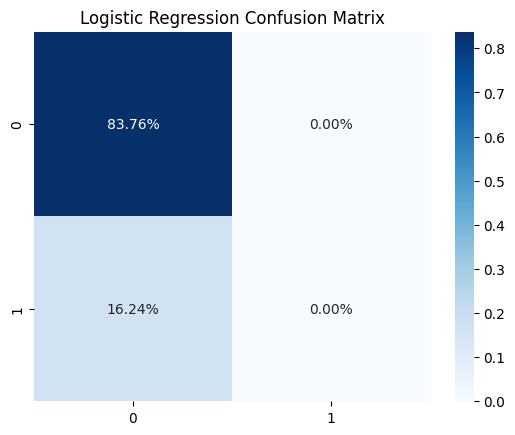

In [ ]:
sns.heatmap(MyCM/np.sum(MyCM), annot=True, fmt='.2%', cmap='Blues').set(title = 'Logistic Regression Confusion Matrix')


In [ ]:
print(My_LR_Model.score(TrainingData, TrainingLabels))
print(My_LR_Model.predict_proba(TestingData))

0.8470066518847007
[[0.90796565 0.09203435]
 [0.97094123 0.02905877]
 [0.84565465 0.15434535]
 ...
 [0.91182454 0.08817546]
 [0.82740661 0.17259339]
 [0.69197803 0.30802197]]


In [ ]:
## We can print the coefficients (the weights) of the model
print(My_LR_Model.coef_)
## and we can print the intercept (b) for the model
print(My_LR_Model.intercept_)

[[ 8.42358945e-08 -4.54814771e-06 -6.76816537e-06  2.22001765e-06
   1.13303145e-05 -7.62616462e-07  8.20585108e-07 -2.95161049e-06
  -3.35429476e-05  6.00235856e-09  2.62315708e-07 -1.01493757e-08
   7.30960434e-08]]
[2.51971615e-09]


In [ ]:
accuracy = accuracy_score(MyModelPredictions, TestingLabels)
print('Accuracy for Logistic Regression:', accuracy)

Accuracy for Logistic Regression: 0.8376421923474664


In [ ]:
# Now to compare with Multinomial Naive Bayes on the same data
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
# Fit MNB
mnb = MultinomialNB(alpha=0.8, fit_prior=True, force_alpha=True)
mnb.fit(TrainingData, TrainingLabels)

MultinomialNB(alpha=0.8)

In [ ]:
# Evaluate the model
y_pred = mnb.predict(TestingData)
accuracy_mnb = accuracy_score(TestingLabels, y_pred)
f1_mnb = f1_score(TestingLabels, y_pred)

In [ ]:
print("Multinomial Naive Bayes - Accuracy:", accuracy_mnb)
print("Multinomial Naive Bayes - F1-score:", f1_mnb)

Multinomial Naive Bayes - Accuracy: 0.32885211995863495
Multinomial Naive Bayes - F1-score: 0.29225736095965105


In [ ]:
MyCM=confusion_matrix(TestingLabels, y_pred)
print(MyCM)

[[184 626]
 [ 23 134]]


[Text(0.5, 1.0, 'Multinomial NB Confusion Matrix')]

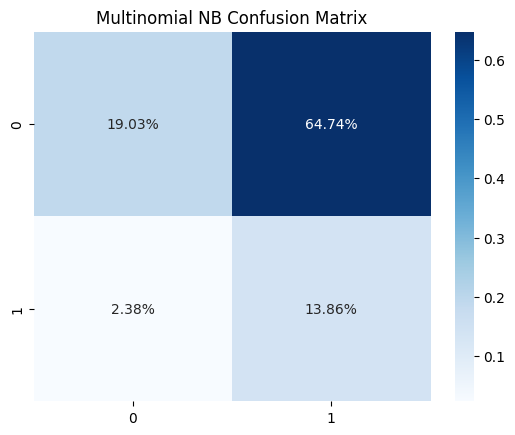

In [ ]:
sns.heatmap(MyCM/np.sum(MyCM), annot=True, fmt='.2%', cmap='Blues').set(title = 'Multinomial NB Confusion Matrix')